**Ejemplo de regresión polinómica**

Existen casos cuando la tendencia de los datos o tienen comportamiento lineal, aquí se puede intentar usar modelos de regresión polinómicos. De los cuales pueden ser:

* Cuadrática: con grado 2.
* Cúbica: con grado 3.

La relación entre la variable independiente $x$ y la variable dependiente  $y$ se modela mediante un polinomio de grado n, así:

\begin{equation}
\hat{y}=w_0x^0+w_1x^1+w_2x^2\cdots w_nx^n = \sum_{i=0}^nw_ix^i
\end{equation}

En donde los $w$'s representan los parámetros del ajuste o la regresión


A continuación se importa un conjunto de datos y en base a dos columnas del dataframe se crea un modelo de una regresión polinómica.

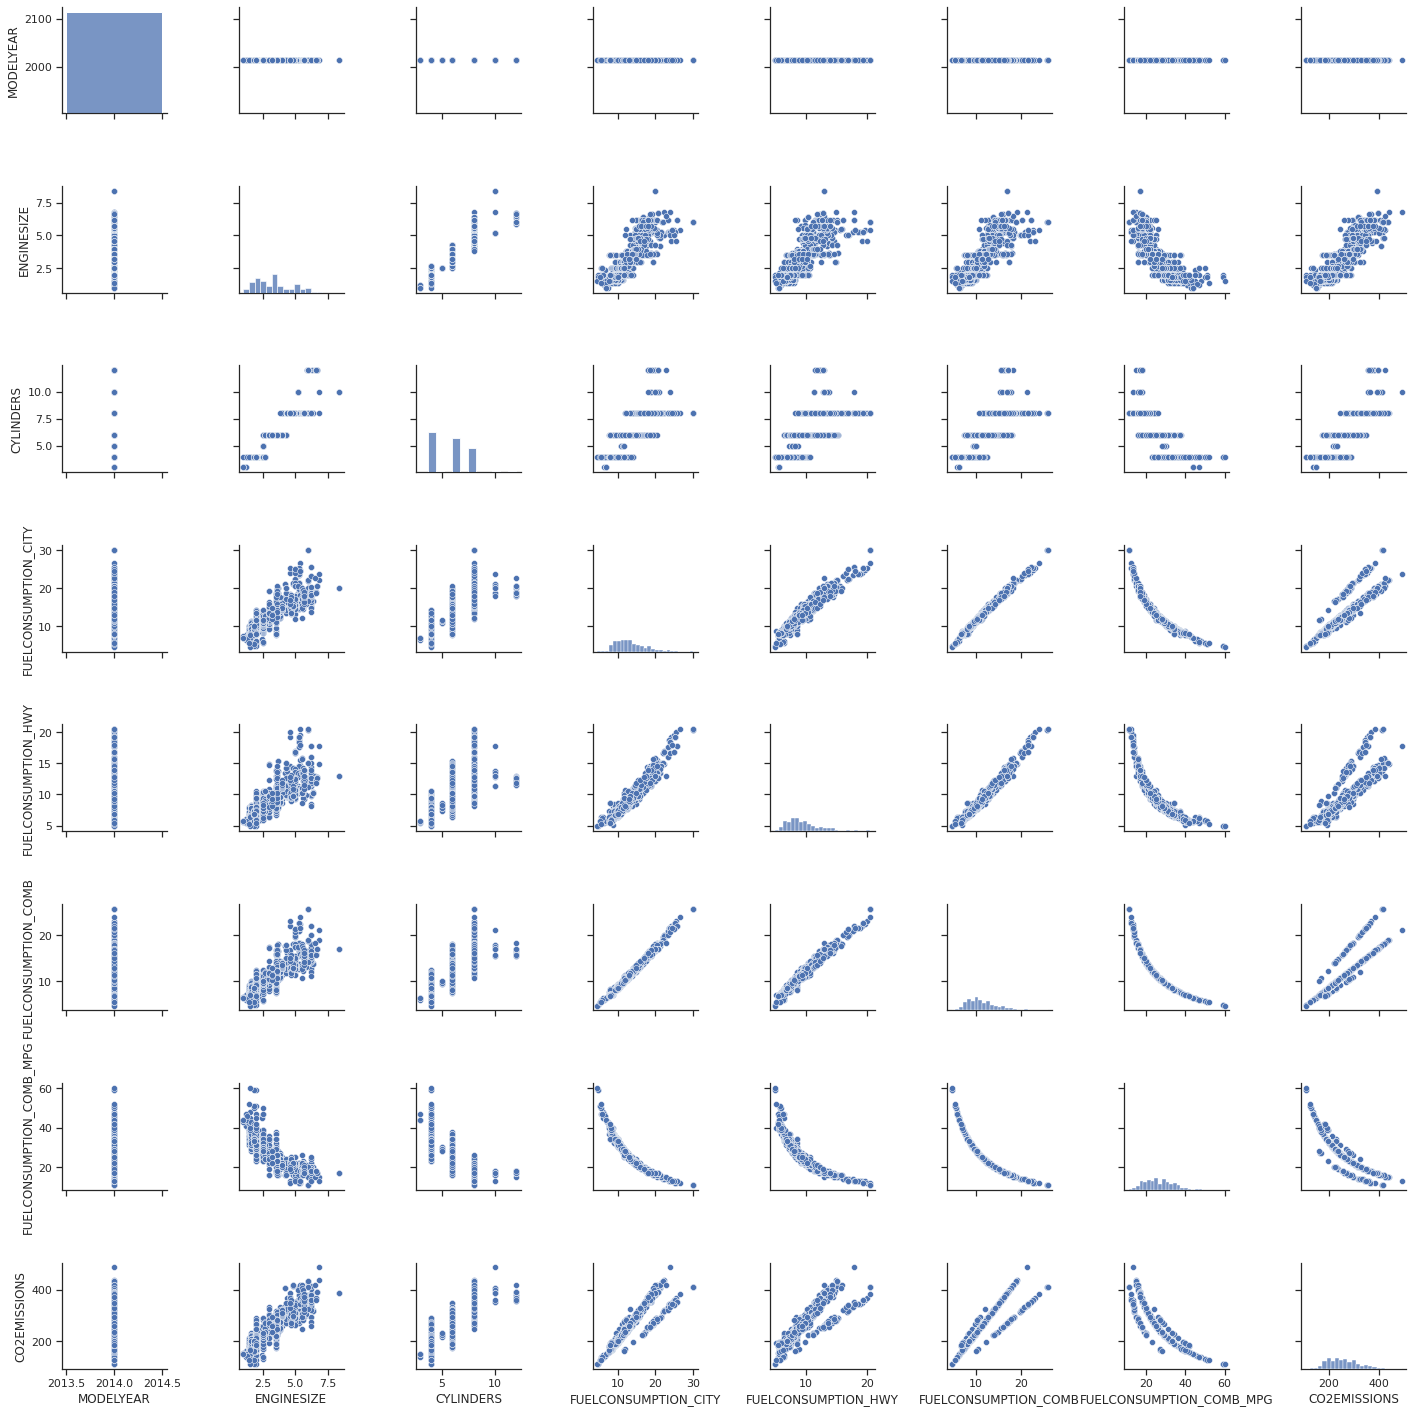

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# leemos el archivo .csv
path="/content/drive/MyDrive/Colab_Notebooks/carros.csv";
df = pd.read_csv(path)

#graficar columnas de df vs columnas del df
sns.set(style="ticks")
sns.pairplot(df)


In [ ]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


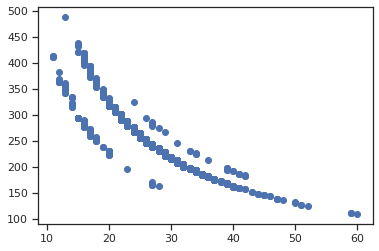

In [ ]:
# se toman dos columnas y se redimenciones a una columna

X=df['FUELCONSUMPTION_COMB_MPG'].values.reshape(-1,1) #predictora
Y=df['CO2EMISSIONS'].values.reshape(-1,1)  #objetivo

plt.scatter(X,Y)

In [ ]:
#importar funciones de sklearn con las cuales creamos y entrenamos nuestro modelo.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
# Separamos nuestro conjunto de datos (asignando el 20% de los datos para test)
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(746, 1) (746, 1)
(321, 1) (321, 1)


#### polinómio de grado 1

In [ ]:
#Creamos nuestro polinomio de grado 2 y lo estimamos con los datos de entrenamiento de x
poly_1 = PolynomialFeatures(degree=1) #se asigna el grado 2 del polinómio
train_x_fit = poly_1.fit_transform(x_train) # se estima el polinómio creado con los datos de entrenamiento
train_x_fit.shape

(746, 2)

In [ ]:
#Como el polinómio se puede separar como una sumatoria, es posible usar la estimación de regresión lineal, enviando como parámetro la matriz de 3 columnas de train_x_fit
polinomio = LinearRegression().fit(train_x_fit, y_train)

print ('constantes: ', polinomio.coef_)
print ('Intercepto: ',polinomio.intercept_)

constantes:  [[ 0.         -7.55298077]]
Intercepto:  [456.24012299]


Text(0, 0.5, 'Emission')

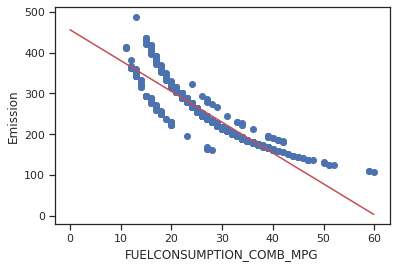

In [ ]:
import numpy as np
##graficar nuestra regresión polinómica de grado 2
plt.scatter(X, Y)
XX = np.arange(0.0, 60.0, 0.1)
YY = polinomio.intercept_[0]+ polinomio.coef_[0][1]*pow(XX,1)
plt.plot(XX, YY, '-r')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")

In [ ]:

linear  = LinearRegression(normalize=True)
linear.fit(x_train,y_train)
y_pred = linear.predict(x_test)
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred)/y_test.mean()**2)
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_test.mean())




MAE:  18.212131468988844
MSE:  0.011515645911551154
RMSE:  0.10731097759107013


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


#### polinómio de grado 2

In [ ]:
#Creamos nuestro polinomio de grado 2 y lo estimamos con los datos de entrenamiento de x
poly_2 = PolynomialFeatures(degree=2) #se asigna el grado 2 del polinómio
train_x_fit = poly_2.fit_transform(x_train) # se estima el polinómio creado con los datos de entrenamiento
train_x_fit.shape

(746, 3)

In [ ]:
#Como el polinómio se puede separar como una sumatoria, es posible usar la estimación de regresión lineal, enviando como parámetro la matriz de 3 columnas de train_x_fit
#Linear= LinearRegression()
Linear=LinearRegression().fit(train_x_fit, y_train)

print ('constantes: ', Linear.coef_)
print ('Intercepto: ',Linear.intercept_)

constantes:  [[  0.         -15.66318809   0.13725869]]
Intercepto:  [567.58627851]


Text(0, 0.5, 'Emission')

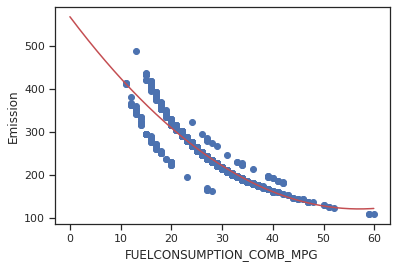

In [ ]:

##graficar nuestra regresión polinómica de grado 2
plt.scatter(X, Y)
XX = np.arange(0.0, 60.0, 0.1)
YY = Linear.intercept_[0]+ Linear.coef_[0][1]*pow(XX,1)+ Linear.coef_[0][2]*pow(XX,2)
plt.plot(XX, YY, '-r')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")

In [ ]:

x_test_poly_2 = poly_2.fit_transform(x_test)
test_y_ = Linear.predict(x_test_poly_2)
train_y_ = Linear.predict(train_x_fit)

print('MAE: %.3f' % metrics.mean_absolute_error(test_y_, y_test))

print('MAE: %.3f' % metrics.mean_absolute_error(train_y_, y_train))
print('MAE: ', metrics.mean_absolute_error(test_y_, y_test)/y_test.mean())

MAE: 14.738
MAE: 13.111
MAE:  0.05670207625685202


### polinómio de grado 3

In [ ]:
#Creamos nuestro polinomio de grado 3 y lo estimamos con los datos de entrenamiento de x
poly_3 = PolynomialFeatures(degree=3) #se asigna el grado 3 del polinómio
train_x_fit = poly_3.fit_transform(x_train) # se estima el polinómio creado con los datos de entrenamiento
train_x_fit.shape

(746, 4)

In [ ]:
#Como el polinómio se puede separar como una sumatoria, es posible usar la estimación de regresión lineal, enviando como parámetro la matriz de 4 columnas de train_x_fit
polinomio = LinearRegression().fit(train_x_fit, y_train)

print ('constantes: ', polinomio.coef_)
print ('Intercepto: ',polinomio.intercept_)

constantes:  [[ 0.00000000e+00 -9.56129797e+00 -4.65098868e-02  1.71712533e-03]]
Intercepto:  [504.3643597]


Text(0, 0.5, 'Emission')

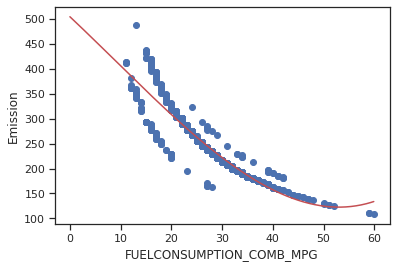

In [ ]:
##graficar nuestra regresión polinómica de grado 3
plt.scatter(X, Y)
XX = np.arange(0.0, 60.0, 0.1)
YY = polinomio.intercept_[0]+ polinomio.coef_[0][1]*pow(XX,1)+ polinomio.coef_[0][2]*pow(XX,2)+ polinomio.coef_[0][3]*pow(XX,3)
plt.plot(XX, YY, '-r')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")

In [ ]:

x_test_poly_3 = poly_3.fit_transform(x_test)
test_y_ = polinomio.predict(x_test_poly_3)
train_y_ = polinomio.predict(train_x_fit)

print('MAE: %.3f' % metrics.mean_absolute_error(test_y_, y_test))

print('MAE: %.3f' % metrics.mean_absolute_error(train_y_, y_train))
print('MAE: ', metrics.mean_absolute_error(test_y_, y_test)/y_test.mean())

MAE: 14.364
MAE: 13.955
MAE:  0.05649991893067821


polinómio de grado 4

In [ ]:
#Creamos nuestro polinomio de grado 4 y lo estimamos con los datos de entrenamiento de x
poly_4 = PolynomialFeatures(degree=4) #se asigna el grado 4 del polinómio
train_x_fit = poly_4.fit_transform(x_train) # se estima el polinómio creado con los datos de entrenamiento
train_x_fit.shape

(746, 5)

In [ ]:
#Como el polinómio se puede separar como una sumatoria, es posible usar la estimación de regresión lineal, enviando como parámetro la matriz de 5 columnas de train_x_fit
polinomio = LinearRegression().fit(train_x_fit, y_train)

print ('constantes: ', polinomio.coef_)
print ('Intercepto: ',polinomio.intercept_)

constantes:  [[ 0.00000000e+00  2.80945183e+01 -1.99473015e+00  4.33936916e-02
  -3.11578368e-04]]
Intercepto:  [251.33920154]


Text(0, 0.5, 'Emission')

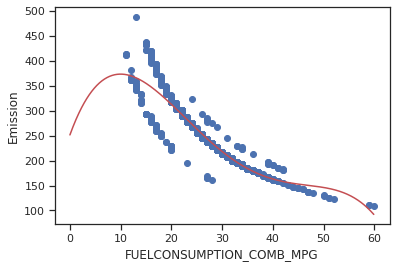

In [ ]:
##graficar nuestra regresión polinómica de grado 4
plt.scatter(X, Y)
XX = np.arange(0.0, 60.0, 0.1)
YY = polinomio.intercept_[0]+ polinomio.coef_[0][1]*pow(XX,1)+ polinomio.coef_[0][2]*pow(XX,2)+ polinomio.coef_[0][3]*pow(XX,3)+ polinomio.coef_[0][4]*pow(XX,4)
plt.plot(XX, YY, '-r')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")

In [ ]:
x_test_poly_4 = poly_4.fit_transform(x_test)
test_y_ = polinomio.predict(x_test_poly_4)
train_y_ = polinomio.predict(train_x_fit)

print('MAE: %.3f' % metrics.mean_absolute_error(test_y_, y_test))

print('MAE: %.3f' % metrics.mean_absolute_error(train_y_, y_train))
print('MAE: ', metrics.mean_absolute_error(test_y_, y_test)/y_test.mean())

MAE: 12.510
MAE: 12.219
MAE:  0.049205665303798655


#### Regresión grado 12

In [ ]:
from sklearn import metrics

linear = LinearRegression()

polinomio = PolynomialFeatures(degree=12)
x_train_polinomio = polinomio.fit_transform(x_train)

linear.fit(x_train_polinomio, y_train)
x_test_polinomio = polinomio.fit_transform(x_test)
test_y_ = linear.predict(x_test_polinomio)
train_y_ = linear.predict(x_train_polinomio)

print('MAE: %.3f' % metrics.mean_absolute_error(test_y_, y_test))
print('RMSE: %.3f' % np.sqrt(metrics.mean_squared_error(test_y_, y_test)))
print('R2(train): %.3f'% metrics.r2_score(train_y_, y_train))
print('R2(test): %.3f'% metrics.r2_score(test_y_, y_test))


MAE: 12.217
RMSE: 24.740
R2(train): 0.846
R2(test): 0.814


Text(0, 0.5, 'Emission')

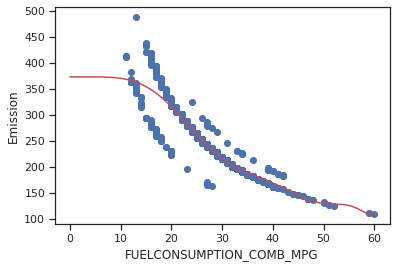

In [ ]:
##graficar nuestra regresión polinómica de grado 12
plt.scatter(X, Y)
XX = np.arange(0.0, 60.0, 0.1)
YY = linear.intercept_[0]
for i in range(13):
  YY+=linear.coef_[0][i]*pow(XX,i)

plt.plot(XX, YY, '-r')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")